In [72]:
import lyricsgenius 
genius = lyricsgenius.Genius("d1hmZoPHCQV7ArFlHTtK5pH-dEgnPSYX8pWZgyMExuQWLturnS6yZTO3uSV9ya6R")
artist = genius.search_artist("Daniel Balavoine", max_songs=500, sort="title")

# Créer un dictionnaire pour stocker les paroles des chansons
lyrics_dict = {}

# Parcourir les chansons de l'artiste
for song in artist.songs:
    # Récupérer les paroles de la chanson
    lyrics = song.lyrics
    
    # Ajouter les paroles de la chanson au dictionnaire avec le titre de la chanson comme clé
    lyrics_dict[song.title] = lyrics

# Afficher le dictionnaire des paroles de chansons
print(lyrics_dict)

Searching for songs by Daniel Balavoine...

Song 1: "10.000 mètres"
Song 2: "Aimer est plus fort que d’être aimé"
Song 3: "Allez hop !"
Song 4: "Au revoir"
Song 5: "Banlieue nord"
Song 6: "Bateau toujours"
Song 7: "Ces petits riens"
Song 8: "C’est fini"
Song 9: "C’est un voyou"
Song 10: "Correspondances"
Song 11: "Couleurs d’automne"
Song 12: "Dancing samedi"
Song 13: "Des gens comme vous"
Song 14: "Détournement"
Song 15: "De vous à elle en passant par moi"
Song 16: "Dieu que c’est beau"
Song 17: "Dieu que l’amour est triste"
Song 18: "Drôle de galaxie"
Song 19: "Elu par les boeufs"
Song 20: "Evelyne et moi"
Song 21: "Face amour / face amère"
Song 22: "France"
Song 23: "Frappe avec ta tête"
"Interview de Johnny Rockfort" is not valid. Skipping.
"Interview de Johnny Rockfort" is not valid. Skipping.
Song 24: "Je ne suis pas un Héros"
Song 25: "J’entends cogner ton coeur"
Song 26: "Je veux de l’or"
Song 27: "La Confiture"
Song 28: "La danse"
Song 29: "Lady Marlène"
Song 30: "La fillette 

In [73]:
lyrics_dict

{'10.000 mètres': "4 Contributors10.000 mètres Lyrics[Couplet 1]\nJe cours\nJe me sens à l'aise\nJe pourrais m'en tirer\nJe cours, ça va\nEt rien ne me pèse\nJe suis dans la foulée\n\n[Pré-refrain]\nJe cours, ça m'fait du bien\nJe cours pour courir\nJ'ai jamais gagné\nMais pourtant, ce soir\nJe tiens le train\nEn faisant attention\nJe peux finir premier\n\n[Refrain]\nSi mon cœur va pas trop vite\nOh, si mon cœur va pas trop vite\nSi mon cœur va pas trop vite\nOh, si mon cœur va pas trop vite\n\n[Post-refrain]\nJ'peux partir mais faut pas que je parte\n25 tours, faut qu'j'attaque au 24\nJe surveille le 18 et le 4\nAlors\nJe sais qu'ils voudraient m'enfermer\nJe laisse la corde pour m'dégager\nJe me sens bien\nJ'accélère un peu le train\nFaut qu'ils décrochent un par un\nJe serre les poings\nYou might also like[Couplet 2]\nJe cours\nJe cherche un peu d'air\nPersonne n'prend le relais\nJe cours, j'ai mal\nJe penche en arrière\nJ'ai peur de me noyer\n\n[Pré-refrain]\nDerrière mo,i j'entend

In [74]:
lyrics_dict_preprocessed['Banlieue nord']

'  banlieue nord appelle johnny rockfort né banlieue nord grandi trottoirs choisi zonard mère devenue folle père buvait trop ans quitté école pris métro foi loi veux vivre mourir feu lieu veux rentrer dormir banlieue cassé partir passé avenir cassé partir passé avenir avenir terre faire avenir terre faire jamais travaillé bien débrouillé jour retrouvé underground café rencontré amis aujourd sais coucher passe nuits likesans foi loi veux vivre mourir feu lieu veux rentrer dormir banlieue cassé partir passé avenir foi loi veux vivre mourir feu lieu veux rentrer dormir banlieue cassé partir passé avenir passé avenir passé avenir passé avenir passé avenir passé avenir passé avenir passé avenir passé passé passé avenir passé avenir passé avenir passé avenir passé avenir passé passé passé avenir passé avenir passé avenir passé avenir passé avenir passé avenirembed'

In [75]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
import spacy

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))
nlp = spacy.load('fr_core_news_sm')

lyrics_dict_preprocessed={}

for key, value in lyrics_dict.items():
    # Utiliser une expression régulière pour supprimer la partie entre les premières guillemets " et la fin du mot "contributors"
    cleaned_value = re.sub(r'"[^"]*Contributors', '', value)
    
    # Remplacer la valeur d'origine par la nouvelle valeur nettoyée
    lyrics_dict[key] = cleaned_value


# Fonction de prétraitement pour remplacer la ponctuation par des espaces, supprimer les mots d'une lettre et supprimer les espaces en trop


def preprocess(text):
    text = text.replace("Contributors", "")
    text = text.replace("Lyrics", "")
    text = text.replace("TranslationsEnglish", "")
    
    # Remplacer la valeur d'origine par la nouvelle valeur nettoyée
    text = re.sub(r'\bint\b', '', text, count=1)
    
    # Remplacer la ponctuation par des espaces
    text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
    
    # Supprimer les mots composés d'une seule lettre
    text = re.sub(r'\b\w\b', '', text)
    # Supprimer les espaces en trop
    text = re.sub(r'\s+', ' ', text)
    # Convertir en minuscules
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop]
    
    #stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    
   
    additional_french_stop_words = {'quand', 'tout', 'si','contributors',"oh","refrain","might","lyric","lyrics","couplet",'also','a','you','like'}  # Ajoutez d'autres mots vides au besoin

    all_french_stop_words = stop_words.union(additional_french_stop_words)   
    tokens = [token for token in tokens if token not in all_french_stop_words]
    
    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Stemmatization
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(token) for token in tokens]
    # Rejoindre les tokens en une chaîne de caractères
    processed_text = ' '.join(tokens)
    return processed_text

# Parcourir le dictionnaire et prétraiter les paroles de chaque chanson
for title, lyrics in lyrics_dict.items():
    processed_lyrics = preprocess(lyrics)
    lyrics_dict_preprocessed[title] = processed_lyrics

lyrics_dict_preprocessed


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'10.000 mètres': '  10 000 mètres cours sens aise tirer cours rien pèse foulée pré cours bien cours courir jamais gagné pourtant soir train attention finir cœur trop vite cœur trop vite cœur trop vite cœur trop vite post partir faut parte 25 tours faut attaque 24 surveille 18 sais voudraient enfermer laisse corde dégager sens bien accélère train faut décrochent serre poings cours cherche air prend relais cours mal penche arrière peur noyer pré mo entends mer poussée vagues public levé pieds enfoncent sable quelqu dépasse eau salée yeux trop vite trop vite trop vite trop vite interlude instrumentale pont 10 000 mètres dernier tour vie dernier jour tour trop tour trop perdu trop vite trop vite perdu trop vite trop vite perdu trop vite trop vite perdu trop vite trop vite perdu trop vite trop viteembed',
 'Aimer est plus fort que d’être aimé': '  aimer fort ’ aimé sais rempart avances regards courroucés écris buvard mots inversés parles faut savoir lancent regards courroucés voudront voir

In [76]:
lyrics_dict_preprocessed["Le Chanteur"]

'10 chanteur présente appelle henri voudrais bien réussir vie aimé beau gagner argent intelligent faudrait bosse plein temps chanteur chante copains veux faire tubes tourne bien tourne bien veux écrire chanson vent air gai chic entraînant faire danser soirées monsieur durand partout rue veux filles nues jettent admirent tuent arrachent vertu anciennes école devenir idole veux nuits essoufflées lits trompent maris rêves maudits likepuis rai galas public prosternera concerts personnes paris étonne lève prolonger combat partout rue veux filles nues jettent admirent tuent arrachent vertu rester idole remont rai scène années folles rai pleurer yeux ferai adieux année recommencerai année recommencerai prostituerai postérité nouvelles école diront pédé yeux puent alcool ferais mieux arrêter brûleront auréole saliront passé vieux pourrai crever cherch rai dieu pardonner veux mourir malheureux rien regretter veux mourir malheureux7embed'

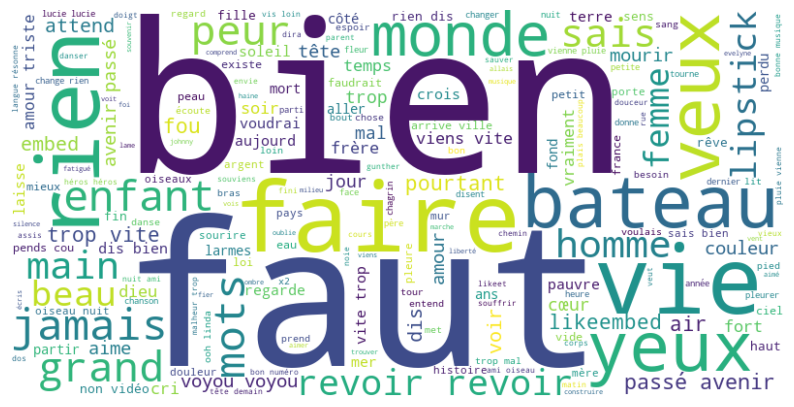

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer toutes les paroles de chansons en une seule chaîne de caractères
all_lyrics = ' '.join(lyrics_dict_preprocessed.values())

# Créer un objet WordCloud avec les paramètres souhaités
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_lyrics)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
common_nouns_list = []

# Iterate through the dictionary items
for lyrics, _ in lyrics_dict_preprocessed.items():
    # Process the lyrics using spaCy
    doc = nlp(_)

    # Extract common nouns from the lyrics
    for token in doc:
        if token.pos_ == "NOUN" and token.ent_type_ == "":
            common_nouns_list.append(token.text)
            
common_nouns_list



['mètres',
 'cours',
 'sens',
 'cours',
 'pèse',
 'cours',
 'cours',
 'attention',
 'tours',
 'attaque',
 'surveille',
 'sais',
 'sens',
 'serre',
 'cours',
 'cherche',
 'cours',
 'penche',
 'peur',
 'poussée',
 'eau',
 'interlude',
 'mètres',
 'tour',
 'vie',
 'jour',
 'tour',
 'perdu',
 'aimer',
 'aimé',
 'rempart',
 'avances',
 'écris',
 'mots',
 'lancent',
 'regards',
 'glace',
 'amour',
 'efforts',
 'amour',
 'délie',
 'face',
 'dévorent',
 'récolte',
 'ambition',
 'haine',
 'voudraient',
 'masse',
 'brise',
 'amour',
 'efforts',
 'amour',
 'délie',
 'face',
 'dévorent',
 'arrêt',
 'frappe',
 'milieu',
 'géants',
 'nom',
 'monde',
 'droit',
 'fatigue',
 'charge',
 'likesoldat',
 'jour',
 'fatigue',
 'beau',
 'femmes',
 'rêvent',
 'retire',
 'fatigue',
 'tête',
 'raison',
 'cœurs',
 'embed',
 'ville',
 'envie',
 'réconfort',
 'tranquille',
 'style',
 'chanson',
 'vie',
 'ciel',
 'rose',
 'enterre',
 'pont',
 'part',
 'choses',
 'cause',
 'banlieue',
 'banlieue',
 'père',
 'ans',
 '

In [79]:
from collections import Counter

# Dictionnaire pour stocker l'occurrence totale de chaque nom dans toutes les musiques
total_occurrences = Counter()

# Dictionnaire pour stocker l'occurrence intermusique de chaque nom
intermusic_occurrences = Counter()

# Iterate through the dictionary items
for _, lyrics in lyrics_dict_preprocessed.items():
    # Process the lyrics using spaCy
    doc = nlp(lyrics)

    # Extract common nouns from the lyrics and count occurrences
    occurrences_in_song = Counter(token.text for token in doc if token.pos_ == "NOUN" and token.ent_type_ == "")

    # Update total occurrences
    total_occurrences.update(occurrences_in_song)

    # Update intermusic occurrences (count each word once per song)
    intermusic_occurrences.update(set(occurrences_in_song))

# Afficher l'occurrence totale de chaque nom dans toutes les musiques
print("Occurrence totale de chaque nom dans toutes les musiques :")
print(total_occurrences)

# Afficher l'occurrence intermusique de chaque nom
print("\nOccurrence intermusique de chaque nom :")
print(intermusic_occurrences)


Occurrence totale de chaque nom dans toutes les musiques :
Counter({'vie': 62, 'amour': 43, '´': 33, 'yeux': 28, 'peur': 26, 'tête': 25, 'avenir': 24, 'ville': 23, 'beau': 21, 'monde': 19, 'terre': 19, 'enfant': 18, 'homme': 18, 'ami': 18, 'hommes': 16, 'nuit': 16, 'larmes': 15, 'cours': 13, 'femmes': 13, 'côté': 13, 'jour': 12, 'ans': 12, 'soleil': 12, 'mort': 12, 'mains': 12, 'vidéo': 12, 'face': 11, 'couleurs': 11, 'mots': 10, 'fin': 10, '’': 10, 'histoire': 10, 'douleur': 10, 'lipstick': 10, 'cou': 10, 'eau': 9, 'milieu': 9, 'espoir': 9, 'rue': 9, 'couleur': 9, 'argent': 9, 'silence': 9, 'bras': 9, 'langue': 9, 'peau': 9, 'change': 9, 'aziza': 9, 'fond': 9, 'musique': 9, 'besoin': 9, 'oui': 8, 'femme': 8, 'drôle': 8, 'temps': 8, 'chemin': 8, 'danse': 8, 'film': 8, 'sens': 7, 'sais': 7, 'tour': 7, 'nom': 7, 'frère': 7, 'voix': 7, 'combat': 7, 'rêve': 7, 'numéro': 7, 'coup': 7, 'haine': 6, 'ciel': 6, 'oiseaux': 6, 'rendez': 6, 'evelyne': 6, 'chose': 6, 'fillette': 6, 'air': 6, 'douce

In [80]:
def find_word_occurrences(word, lyrics_dict):
 
    occurrences_dict = total_occurrences
    
    # Vérifier si le mot est présent dans le dictionnaire
    if word in occurrences_dict:
        # Récupérer les musiques dans lesquelles le mot apparaît
        songs_with_word = [lyrics for lyrics, _ in lyrics_dict_preprocessed.items() if word in _]
        
        # Afficher les musiques dans lesquelles le mot apparaît
        print(f"Le mot '{word}' apparaît dans les musiques suivantes :")
        for song in songs_with_word:
            print(song)
    else:
        print(f"Le mot '{word}' n'apparaît pas dans les paroles.")
        
        
        
selected_word = "ville"


find_word_occurrences(selected_word, lyrics_dict)




Le mot 'ville' apparaît dans les musiques suivantes :
Au revoir
Je veux de l’or
Lucie
Quand on arrive en ville
Toi et moi
Vendeurs de larmes
Vidéo “Série Noire”


In [81]:
from collections import Counter

# Dictionnaire pour stocker l'occurrence totale de chaque nom dans toutes les musiques
total_occurrences_v= Counter()

# Dictionnaire pour stocker l'occurrence intermusique de chaque nom
intermusic_occurrences_v = Counter()

# Iterate through the dictionary items
for _, lyrics in lyrics_dict_preprocessed.items():
    # Process the lyrics using spaCy
    doc = nlp(lyrics)

    # Extract common nouns from the lyrics and count occurrences
    occurrences_in_song = Counter(token.text for token in doc if token.pos_ == "VERB" and token.ent_type_ == "")

    # Update total occurrences
    total_occurrences_v.update(occurrences_in_song)

    # Update intermusic occurrences (count each word once per song)
    intermusic_occurrences_v.update(set(occurrences_in_song))

# Afficher l'occurrence totale de chaque nom dans toutes les musiques
print("Occurrence totale de chaque V dans toutes les musiques :")
print(total_occurrences_v)

# Afficher l'occurrence intermusique de chaque nom
print("\nOccurrence intermusique de chaque V :")
print(intermusic_occurrences_v)


Occurrence totale de chaque V dans toutes les musiques :
Counter({'faut': 58, 'revoir': 34, 'passé': 32, 'voir': 23, 'vivre': 21, 'aller': 19, 'mourir': 19, 'aime': 19, 'faire': 18, 'laisse': 17, 'pauvre': 16, 'veut': 15, 'arrive': 14, 'sais': 13, 'porte': 12, 'pleure': 12, 'changer': 12, 'pris': 11, 'danser': 11, 'vienne': 11, 'faudrait': 10, 'supporter': 10, '’': 9, 'sourire': 9, 'existe': 9, 'regarde': 9, 'corps': 9, 'rougeàgèvre': 9, 'partir': 8, 'voulais': 8, 'fallait': 8, 'passant': 8, 'pleurer': 8, 'perdu': 7, 'apprend': 7, 'attend': 7, 'sauver': 7, 'souffrir': 7, 'montrer': 7, 'résonne': 7, 'plais': 7, 'trouver': 6, 'embed': 6, 'assis': 6, 'donne': 6, 'inquiéter': 6, 'likeet': 6, 'prendre': 6, 'vois': 6, 'parti': 6, 'monde': 6, 'remercie': 6, 'entend': 6, 'coup': 6, 'courir': 5, 'cœur': 5, 'savoir': 5, 'aimer': 5, 'allez': 5, 'oublie': 5, 'pouvoir': 5, 'essayer': 5, 'voudrais': 5, 'voulait': 5, 'revenir': 5, 'met': 5, 'attendant': 5, 'noie': 5, 'tombe': 5, 'voudrait': 5, 'chang

In [82]:
def find_word_occurrences_V(word, lyrics_dict, intermusic=False):
    # Sélectionner le dictionnaire approprié en fonction de intermusic
    occurrences_dict = total_occurrences_v
    
    # Vérifier si le mot est présent dans le dictionnaire
    if word in occurrences_dict:
        # Récupérer les musiques dans lesquelles le mot apparaît
        songs_with_word = [lyrics for lyrics, _ in lyrics_dict.items() if word in _]
        
        # Afficher les musiques dans lesquelles le mot apparaît
        print(f"Le mot '{word}' apparaît dans les musiques suivantes :")
        for song in songs_with_word:
            print(song)
    else:
        print(f"Le mot '{word}' n'apparaît pas dans les paroles.")
        
        
        
selected_word = "sourire"

# Rechercher le mot dans le dictionnaire des occurrences totales
find_word_occurrences_V(selected_word, lyrics_dict)



Le mot 'sourire' apparaît dans les musiques suivantes :
Couleurs d’automne
Drôle de galaxie
L’enfant aux yeux d’Italie
Lire Un Livre
Mon fils ma bataille
Mon pauvre Gunther
Pour la femme veuve qui s’éveille


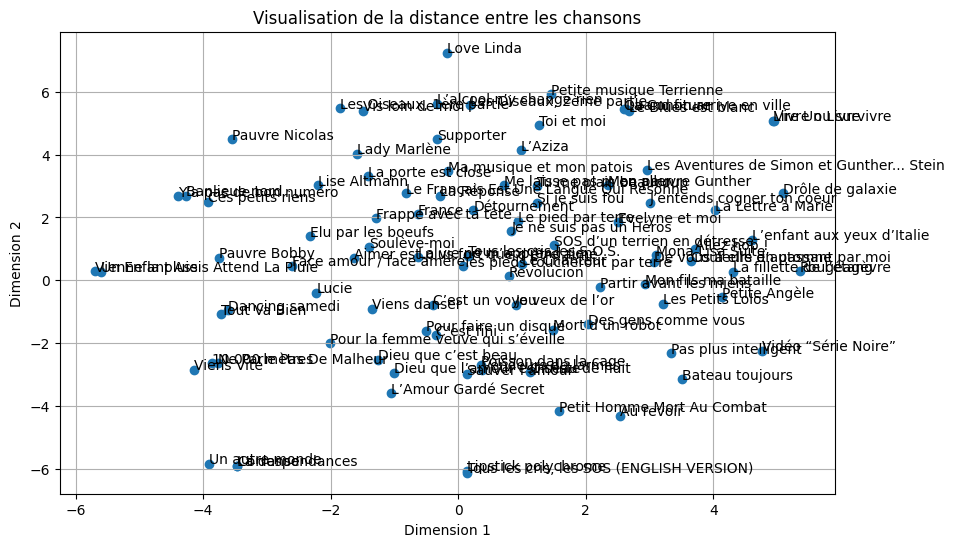

In [83]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Transformer les paroles en vecteurs TF-IDF
vectorizer = TfidfVectorizer()
musiques_vecteurs = vectorizer.fit_transform(list(lyrics_dict.values()))

# Réduire la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
musiques_embedded = tsne.fit_transform(musiques_vecteurs.toarray())

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(musiques_embedded[:, 0], musiques_embedded[:, 1], marker='o')

# Ajouter des étiquettes pour chaque chanson
for i, label in enumerate(lyrics_dict.keys()):
    plt.annotate(label, (musiques_embedded[i, 0], musiques_embedded[i, 1]))

plt.title("Visualisation de la distance entre les chansons")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

In [90]:
import pandas as pd
import plotly.express as px


# Transformer les paroles en vecteurs TF-IDF
vectorizer = TfidfVectorizer()
musiques_vecteurs = vectorizer.fit_transform(list(lyrics_dict.values()))

# Réduire la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
musiques_embedded = tsne.fit_transform(musiques_vecteurs.toarray())

# Créer un DataFrame pour Plotly Express
df = pd.DataFrame(musiques_embedded, columns=['Dimension 1', 'Dimension 2'])
df['Musique'] = list(lyrics_dict.keys())

# Créer la figure interactive avec Plotly Express
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', text='Musique', title="Visualisation de la distance entre les chansons")

# Afficher la figure
fig.show()


ImportError: Plotly express requires pandas to be installed.

In [89]:
pip install plotly==5.21.0 

Note: you may need to restart the kernel to use updated packages.


In [86]:
import plotly.express as px

# Réduire la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
musiques_embedded = tsne.fit_transform(musiques_texte)  # musiques_texte contient les paroles directement

# Créer un DataFrame pour Plotly Express
df = pd.DataFrame(musiques_embedded, columns=['Dimension 1', 'Dimension 2'])
df['Musique'] = list(lyrics_dict.keys())

# Créer la figure interactive avec Plotly Express
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', text='Musique', title="Visualisation de la distance entre les chansons")

# Afficher la figure
fig.show()


ImportError: Plotly express requires pandas to be installed.